In [382]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, classification_report, 
confusion_matrix, precision_recall_curve, precision_score, recall_score, average_precision_score)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# plt.style.use('seaborn')
sns.set()

In [80]:
df = pd.read_csv('pulsar_stars.csv')

In [81]:
#Fix the white space in front of all the column names (except for target_class)
clean_column_names = []

for name in df.columns:
    clean_name = name.lstrip()
    clean_column_names.append(clean_name)
    
df.columns = clean_column_names
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [82]:
#Separate the features from the target
X = df.drop('target_class', axis='columns')
y = df['target_class']

In [83]:
#Split regular data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [104]:
#Use MinMaxScaler on X_train and X_test
mmscaler = MinMaxScaler()
X_train_minmax = mmscaler.fit_transform(X_train)
X_test_minmax = mmscaler.transform(X_test)

In [110]:
#Use StandardScaler on X_train and X_test
standscaler = StandardScaler()
X_train_stand = standscaler.fit_transform(X_train)
X_test_stand = standscaler.transform(X_test)

# KNN

### KNN with GridSearch

In [316]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors' : np.arange(1, 15)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5).fit(X_train, y_train)

In [384]:
knn_gscv_auroc = roc_auc_score(y_test, knn_gscv.predict_proba(X_test)[:, 1])
knn_gscv_pr_auc = average_precision_score(y_test, knn_gscv.predict_proba(X_test)[:, 1])

print(f"AUROC score: {knn_gscv_auroc}")
print(f"Best n_neighbors: {knn_gscv.best_params_.get('n_neighbors')}")
print(f"PR-AUC score: {knn_gscv_pr_auc}")
      

AUROC score: 0.9387982639737636
Best n_neighbors: 13
PR-AUC score: 0.8500571167796873


In [387]:
print(classification_report(y_test, knn_gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.91      0.78      0.84       384

    accuracy                           0.97      4475
   macro avg       0.95      0.89      0.91      4475
weighted avg       0.97      0.97      0.97      4475



### Test using scaled data (MinMaxScaler and Standard Scaler)

#### MinMaxScaled data

In [318]:
param_grid = {'n_neighbors' : np.arange(1, 15)}

knn_gscv_minmax = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5).fit(X_train_minmax, y_train)

In [385]:
knn_gscv_minmax_auroc = roc_auc_score(y_test, knn_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
knn_gscv_minmax_pr_auc = average_precision_score(y_test, knn_gscv_minmax.predict_proba(X_test_minmax)[:, 1])

print(f"AUROC score: {knn_gscv_minmax_auroc}")
print(f"Best n_neighbors: {knn_gscv_minmax.best_params_.get('n_neighbors')}")
print(f"PR-AUC score: {knn_gscv_minmax_pr_auc}")

AUROC score: 0.9519865125682394
Best n_neighbors: 9
PR-AUC score: 0.8740399256923084


In [329]:
print(classification_report(y_test, knn_gscv_minmax.predict(X_test_minmax)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.92      0.82      0.87       384

    accuracy                           0.98      4475
   macro avg       0.95      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



#### StandardScaled data

In [320]:
param_grid = {'n_neighbors' : np.arange(1, 15)}

knn_gscv_stand = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5).fit(X_train_stand, y_train)

In [386]:
knn_gscv_stand_auroc = roc_auc_score(y_test, knn_gscv_stand.predict_proba(X_test_stand)[:, 1])
knn_gscv_stand_pr_auc = average_precision_score(y_test, knn_gscv_stand.predict_proba(X_test_stand)[:, 1])

print(f"AUROC score: {knn_gscv_stand_auroc}")
print(f"Best n_neighbors: {knn_gscv_stand.best_params_.get('n_neighbors')}")
print(f"PR-AUC score: {knn_gscv_stand_pr_auc}")

AUROC score: 0.9471114183573698
Best n_neighbors: 9
PR-AUC score: 0.8717938637460043


In [432]:
print(classification_report(y_test, knn_gscv_stand.predict(X_test_stand)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.91      0.82      0.86       384

    accuracy                           0.98      4475
   macro avg       0.95      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



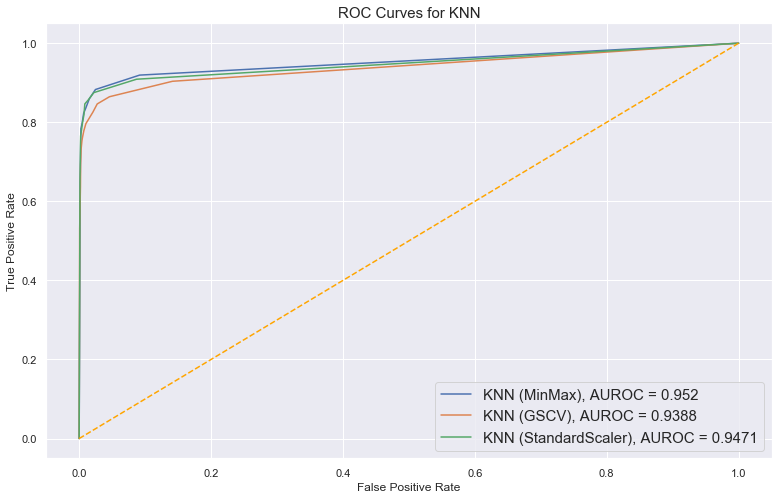

In [374]:
_ = plt.figure(figsize=(13, 8))

fpr_min, tpr_min, thresholds = roc_curve(y_test, knn_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
_ = plt.plot(fpr_minmax, tpr_minmax, label=f"KNN (MinMax), AUROC = {round(knn_gscv_minmax_auroc, 4)}")

fpr, tpr, thresholds = roc_curve(y_test, knn_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(fpr, tpr, label=f"KNN (GSCV), AUROC = {round(knn_gscv_auroc, 4)}")

fpr, tpr, thresholds = roc_curve(y_test, knn_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(fpr, tpr, label=f"KNN (StandardScaler), AUROC = {round(knn_gscv_stand_auroc, 4)}")

_ = plt.plot([0, 1], [0, 1], linestyle='--', color='orange') 

_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curves for KNN', fontsize=15)

_ = plt.legend(fontsize=15)
plt.show()

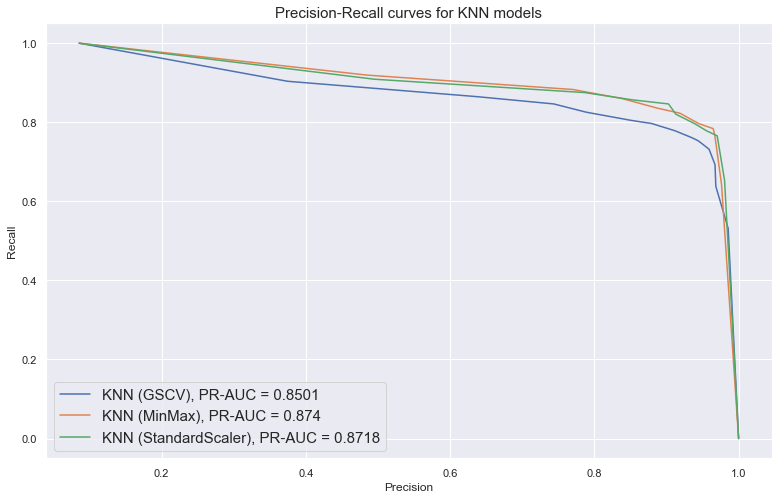

In [389]:
_ = plt.figure(figsize=(13, 8))

precision, recall, threshold = precision_recall_curve(y_test, knn_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(precision, recall, label=f"KNN (GSCV), PR-AUC = {round(knn_gscv_pr_auc, 4)}")

precision, recall, threshold = precision_recall_curve(y_test, knn_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
_ = plt.plot(precision, recall, label=f"KNN (MinMax), PR-AUC = {round(knn_gscv_minmax_pr_auc, 4)}")

precision, recall, threshold = precision_recall_curve(y_test, knn_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(precision, recall, label=f"KNN (StandardScaler), PR-AUC = {round(knn_gscv_stand_pr_auc, 4)}")

_ = plt.xlabel("Precision")
_ = plt.ylabel("Recall")
_ = plt.title("Precision-Recall curves for KNN models", fontsize=15)

_ = plt.legend(loc='lower left', fontsize=15)
plt.show()

In [477]:
knn_models = [knn_gscv, knn_gscv_minmax, knn_gscv_scaled]
knn_strings = ['KNN (GSCV)', 'KNN (StandardScaler)', 'KNN (MinMaxScaler)']
knn_pr_auc_scores = [
    round(average_precision_score(y_test, knn_gscv.predict_proba(X_test)[:, 1]), 3),
    round(average_precision_score(y_test, knn_gscv_minmax.predict_proba(X_test_minmax)[:, 1]), 3),
    round(average_precision_score(y_test, knn_gscv_stand.predict_proba(X_test_stand)[:, 1]), 3)

]
knn_roc_auc_scores = [
    round(roc_auc_score(y_test, knn_gscv.predict_proba(X_test)[:, 1]), 3),
    round(roc_auc_score(y_test, knn_gscv_minmax.predict_proba(X_test_minmax)[:, 1]), 3),
    round(roc_auc_score(y_test, knn_gscv_stand.predict_proba(X_test_stand)[:, 1]), 3)

]

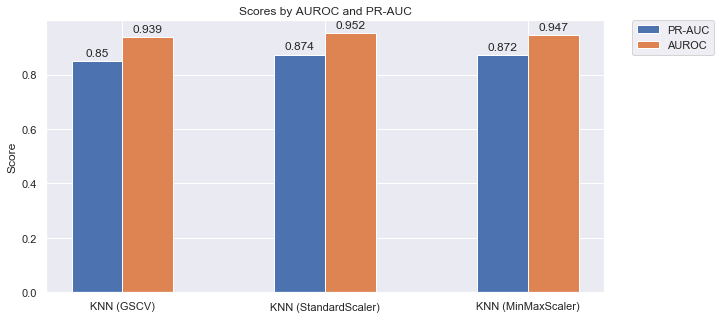

In [480]:
label_loc = np.arange(len(knn_strings))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(label_loc - width/2, knn_pr_auc_scores, width, label='PR-AUC')
rects2 = ax.bar(label_loc + width/2, knn_roc_auc_scores, width, label='AUROC')

ax.set_ylabel('Score')
ax.set_title('Scores by AUROC and PR-AUC')
ax.set_xticks(label_loc)
ax.set_xticklabels(knn_strings)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=.0)
plt.show()

### KNN Result: Classifier with Standard scaled data has best AUROC and PR-AUC

# RBF SVM

In [26]:
svm = SVC(gamma='auto', probability=True).fit(X_train, y_train)

In [391]:
svm_auroc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
svm_pr_auc = average_precision_score(y_test, svm.predict_proba(X_test)[:, 1])

print(f"AUROC score: {svm_auroc}")
print(f"PR-AUC score: {svm_pr_auc}")

AUROC score: 0.9933660907072436
PR-AUC score: 0.9709570309723483


In [332]:
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4091
           1       1.00      0.70      0.82       384

    accuracy                           0.97      4475
   macro avg       0.99      0.85      0.90      4475
weighted avg       0.97      0.97      0.97      4475



### SVM with Grid Search

In [181]:
param_grid = {'C' : np.arange(12, 17), 'gamma' : np.logspace(-6, -6, 1)}

In [182]:
svm_gscv = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=3).fit(X_train, y_train)

In [392]:
svm_gscv_auroc = roc_auc_score(y_test, svm_gscv.predict_proba(X_test)[:, 1])
svm_gscv_pr_auc = average_precision_score(y_test, svm_gscv.predict_proba(X_test)[:, 1])

print(f"Best parameters: {svm_gscv.best_params_}")
print(f"AUROC score: {svm_gscv_auroc}")
print(f"PR-AUC score: {svm_gscv_pr_auc}")

Best parameters: {'C': 16, 'gamma': 1e-06}
AUROC score: 0.9620597551535891
PR-AUC score: 0.8855135735609245


In [413]:
print(classification_report(y_test, svm_gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.93      0.76      0.84       384

    accuracy                           0.97      4475
   macro avg       0.95      0.88      0.91      4475
weighted avg       0.97      0.97      0.97      4475



### Test using scaled data (MinMaxScaler and Standard Scaler)

#### MinMaxScaled data

In [134]:
param_grid = {'C' : np.arange(4, 9), 'gamma' : np.arange(8, 13)}

svm_gscv_minmax = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=3).fit(X_train_minmax, y_train)

In [393]:
svm_gscv_minmax_auroc = roc_auc_score(y_test, svm_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
svm_gscv_minmax_pr_auc = average_precision_score(y_test, svm_gscv_minmax.predict_proba(X_test_minmax)[:, 1])

print(f"AUROC score: {svm_gscv_minmax_auroc}")
print(f"Best parameters: {svm_gscv_minmax.best_params_}")
print(f"PR-AUC score: {svm_gscv_minmax_pr_auc}")

AUROC score: 0.9386521734702192
Best parameters: {'C': 8, 'gamma': 11}
PR-AUC score: 0.8743690558492987


In [414]:
print(classification_report(y_test, svm_gscv_minmax.predict(X_test_minmax)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.93      0.83      0.88       384

    accuracy                           0.98      4475
   macro avg       0.96      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



#### StandardScaled data

In [206]:
param_grid = {'C' : np.arange(5, 16, 5), 'gamma' : np.logspace(-3, 0, 4)}

svm_gscv_stand = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=3).fit(X_train_stand, y_train)

In [394]:
svm_gscv_stand_auroc = roc_auc_score(y_test, svm_gscv_stand.predict_proba(X_test_stand)[:, 1])
svm_gscv_stand_pr_auc = average_precision_score(y_test, svm_gscv_stand.predict_proba(X_test_stand)[:, 1])

print(f"AUROC score: {svm_gscv_stand_auroc}")
print(f"Best parameters: {svm_gscv_stand.best_params_}")
print(f"PR-AUC score: {svm_gscv_stand_pr_auc}")

AUROC score: 0.9437879389717265
Best parameters: {'C': 10, 'gamma': 0.1}
PR-AUC score: 0.8784898965052208


In [415]:
print(classification_report(y_test, svm_gscv_stand.predict(X_test_stand)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.93      0.83      0.87       384

    accuracy                           0.98      4475
   macro avg       0.96      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



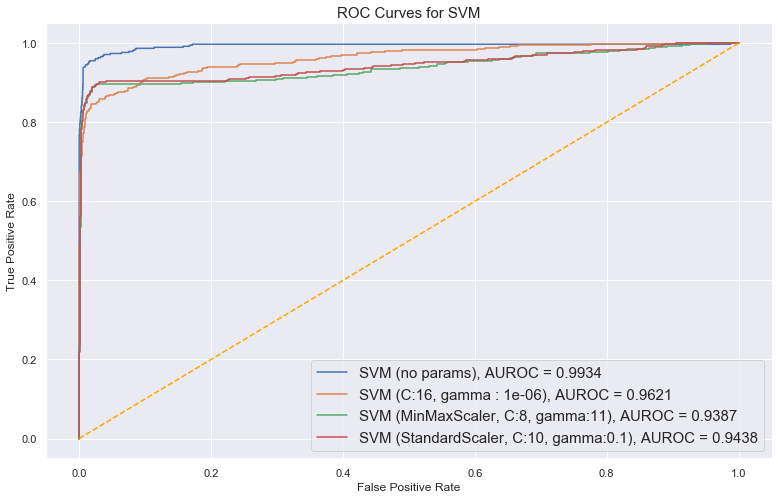

In [416]:
_ = plt.figure(figsize=(13, 8))


fpr, tpr, threshold = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
_ = plt.plot(fpr, tpr, label=f"SVM (no params), AUROC = {round(svm_auroc, 4)}")

fpr, tpr, threshold = roc_curve(y_test, svm_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(fpr, tpr, label=f"SVM (C:{svm_gscv.best_params_.get('C')}, gamma : {svm_gscv.best_params_.get('gamma')}), AUROC = {round(svm_gscv_auroc, 4)}")

fpr, tpr, threshold = roc_curve(y_test, svm_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
_ = plt.plot(fpr, tpr, label=f"SVM (MinMaxScaler, C:{svm_gscv_minmax.best_params_.get('C')}, gamma:{svm_gscv_minmax.best_params_.get('gamma')}), AUROC = {round(svm_gscv_minmax_auroc, 4)}")

fpr, tpr, threshold = roc_curve(y_test, svm_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(fpr, tpr, label=f"SVM (StandardScaler, C:{svm_gscv_stand.best_params_.get('C')}, gamma:{svm_gscv_stand.best_params_.get('gamma')}), AUROC = {round(svm_gscv_stand_auroc, 4)}")


_ = plt.plot([0, 1], [0, 1], linestyle='--', color='orange')

_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curves for SVM', fontsize=15)
_ = plt.legend(fontsize=15)
plt.show()

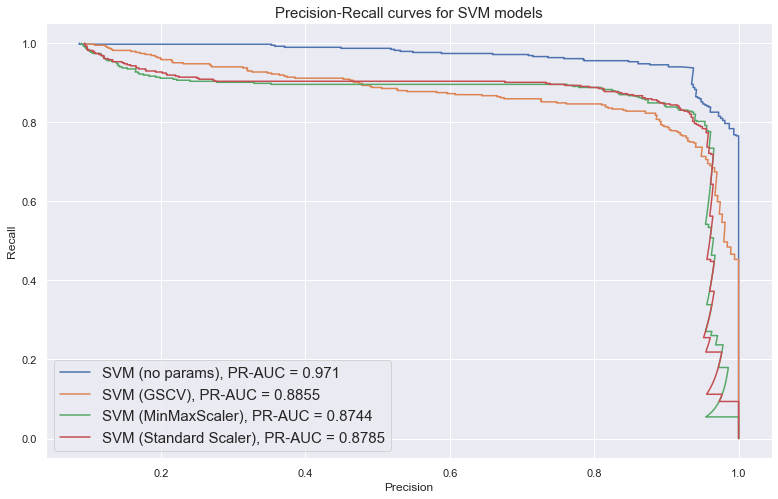

In [397]:
_ = plt.figure(figsize=(13, 8))

precision, recall, threshold = precision_recall_curve(y_test, svm.predict_proba(X_test)[:, 1])
_ = plt.plot(precision, recall, label=f"SVM (no params), PR-AUC = {round(svm_pr_auc, 4)}")

precision, recall, threshold = precision_recall_curve(y_test, svm_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(precision, recall, label=f"SVM (GSCV), PR-AUC = {round(svm_gscv_pr_auc, 4)}")

precision, recall, threshold = precision_recall_curve(y_test, svm_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
_ = plt.plot(precision, recall, label=f"SVM (MinMaxScaler), PR-AUC = {round(svm_gscv_minmax_pr_auc, 4)}")

precision, recall, threshold = precision_recall_curve(y_test, svm_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(precision, recall, label=f"SVM (Standard Scaler), PR-AUC = {round(svm_gscv_stand_pr_auc, 4)}")


_ = plt.xlabel("Precision")
_ = plt.ylabel("Recall")
_ = plt.title("Precision-Recall curves for SVM models", fontsize=15)

_ = plt.legend(loc='lower left', fontsize=15)
plt.show()

In [482]:
svm_models = [svm, svm_gscv, svm_gscv_minmax, svm_gscv_scaled]
svm_strings = ['SVM', 'SVM (GSCV)', 'SVM (StandardScaler)', 'SVM (MinMaxScaler)']
svm_pr_auc_scores = [
    round(average_precision_score(y_test, svm.predict_proba(X_test)[:, 1]), 3),
    round(average_precision_score(y_test, svm_gscv.predict_proba(X_test)[:, 1]), 3),
    round(average_precision_score(y_test, svm_gscv_minmax.predict_proba(X_test_minmax)[:, 1]), 3),
    round(average_precision_score(y_test, svm_gscv_stand.predict_proba(X_test_stand)[:, 1]), 3)

]
svm_roc_auc_scores = [
    round(roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]), 3),
    round(roc_auc_score(y_test, svm_gscv.predict_proba(X_test)[:, 1]), 3),
    round(roc_auc_score(y_test, svm_gscv_minmax.predict_proba(X_test_minmax)[:, 1]), 3),
    round(roc_auc_score(y_test, svm_gscv_stand.predict_proba(X_test_stand)[:, 1]), 3)

]

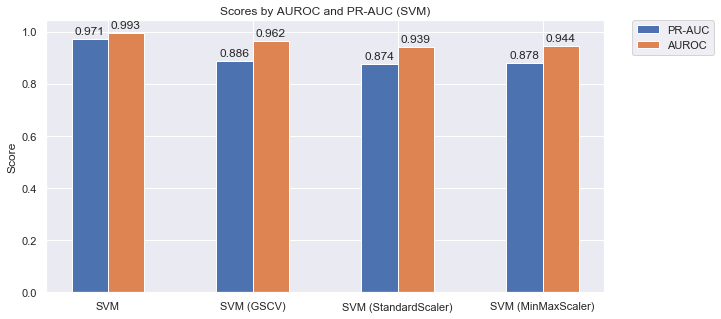

In [495]:
label_loc = np.arange(len(svm_strings))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(label_loc - width/2, svm_pr_auc_scores, width, label='PR-AUC')
rects2 = ax.bar(label_loc + width/2, svm_roc_auc_scores, width, label='AUROC')

ax.set_ylabel('Score')
ax.set_title('Scores by AUROC and PR-AUC (SVM)')
ax.set_xticks(label_loc)
ax.set_xticklabels(svm_strings)

        
autolabel(rects1)
autolabel(rects2)

plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=.0)
plt.show()

### SVM Result: SVM out of box has highest AUROC and PR-AUC

# Logistic Regression

In [271]:
logreg = LogisticRegression().fit(X_train, y_train)

In [398]:
logreg_auroc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
logreg_pr_auc = average_precision_score(y_test, logreg.predict_proba(X_test)[:, 1])

print(f"AUROC score: {logreg_auroc}")
print(f"PR-AUC score: {logreg_pr_auc}")

AUROC score: 0.9711447384502567
PR-AUC score: 0.915331144954469


In [401]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.92      0.83      0.87       384

    accuracy                           0.98      4475
   macro avg       0.95      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



### LogReg with Grid Search

In [273]:
param_grid = {'C' : [1, 10, 20]}

logreg_gscv = GridSearchCV(LogisticRegression(), param_grid=param_grid).fit(X_train, y_train)

In [404]:
logreg_gscv_auroc = roc_auc_score(y_test, logreg_gscv.predict_proba(X_test)[:, 1])
logreg_gscv_pr_auc = average_precision_score(y_test, logreg_gscv.predict_proba(X_test)[:, 1])

print(f"AUROC score: {logreg_gscv_auroc}")
print(f"Best parameters: {logreg_gscv.best_params_}")
print(f"PR-AUC score: {logreg_gscv_pr_auc}")

AUROC score: 0.972282271042125
Best parameters: {'C': 10}
PR-AUC score: 0.9182059406892428


In [410]:
print(classification_report(y_test, logreg_gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.92      0.83      0.87       384

    accuracy                           0.98      4475
   macro avg       0.95      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



### Test using scaled data (MinMaxScaler and Standard Scaler)

#### MinMaxScaled data

In [275]:
param_grid = {'C' : np.logspace(2, 3, 4)}

logreg_gscv_minmax = GridSearchCV(LogisticRegression(), param_grid=param_grid).fit(X_train_minmax, y_train)


In [406]:
logreg_gscv_minmax_auroc = roc_auc_score(y_test, logreg_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
logreg_gscv_minmax_pr_auc = average_precision_score(y_test, logreg_gscv_minmax.predict_proba(X_test_minmax)[:, 1])

print(f"AUROC score: {logreg_gscv_minmax_auroc}")
print(f"Best parameters: {logreg_gscv_minmax.best_params_}")
print(f"PR-AUC score: {logreg_gscv_minmax_pr_auc}")

AUROC score: 0.9724344088649881
Best parameters: {'C': 1000.0}
PR-AUC score: 0.9187785312443577


In [411]:
print(classification_report(y_test, logreg_gscv_minmax.predict(X_test_minmax)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.92      0.82      0.87       384

    accuracy                           0.98      4475
   macro avg       0.95      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



#### StandardScaled data

In [277]:
param_grid = {'C' : np.logspace(0, 2, 3)}

logreg_gscv_stand = GridSearchCV(LogisticRegression(), param_grid=param_grid).fit(X_train_stand, y_train)


In [408]:
logreg_gscv_stand_auroc = roc_auc_score(y_test, logreg_gscv_stand.predict_proba(X_test_stand)[:, 1])
logreg_gscv_stand_pr_auc = average_precision_score(y_test, logreg_gscv_stand.predict_proba(X_test_stand)[:, 1])

print(f"AUROC score: {logreg_gscv_stand_auroc}")
print(f"Best parameters: {logreg_gscv_stand.best_params_}")
print(f"PR-AUC score: {logreg_gscv_stand_pr_auc}")

AUROC score: 0.9724452303837693
Best parameters: {'C': 10.0}
PR-AUC score: 0.9187909586368002


In [412]:
print(classification_report(y_test, logreg_gscv_stand.predict(X_test_stand)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.92      0.82      0.87       384

    accuracy                           0.98      4475
   macro avg       0.95      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



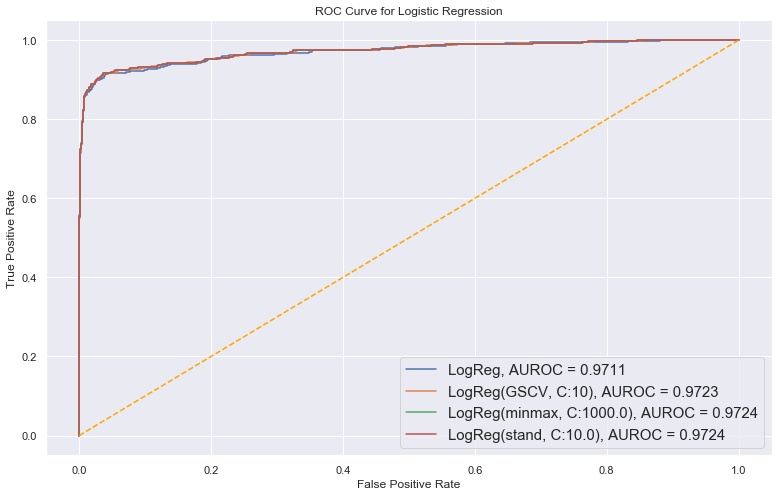

In [282]:
_ = plt.figure(figsize=(13, 8))


fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
_ = plt.plot(fpr, tpr, label=f"LogReg, AUROC = {round(logreg_auroc, 4)}")

fpr, tpr, thresholds = roc_curve(y_test, logreg_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(fpr, tpr, label=f"LogReg(GSCV, C:{logreg_gscv.best_params_.get('C')}), AUROC = {round(logreg_gscv_auroc, 4)}")

fpr, tpr, thresholds = roc_curve(y_test, logreg_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
_ = plt.plot(fpr, tpr, label=f"LogReg(minmax, C:{logreg_gscv_minmax.best_params_.get('C')}), AUROC = {round(logreg_gscv_minmax_auroc, 4)}")

fpr, tpr, thresholds = roc_curve(y_test, logreg_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(fpr, tpr, label=f"LogReg(stand, C:{logreg_gscv_stand.best_params_.get('C')}), AUROC = {round(logreg_gscv_stand_auroc, 4)}")



_ = plt.plot([0, 1], [0, 1], linestyle='--', color='orange')

_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve for Logistic Regression')
_ = plt.legend(fontsize=15)
plt.show()

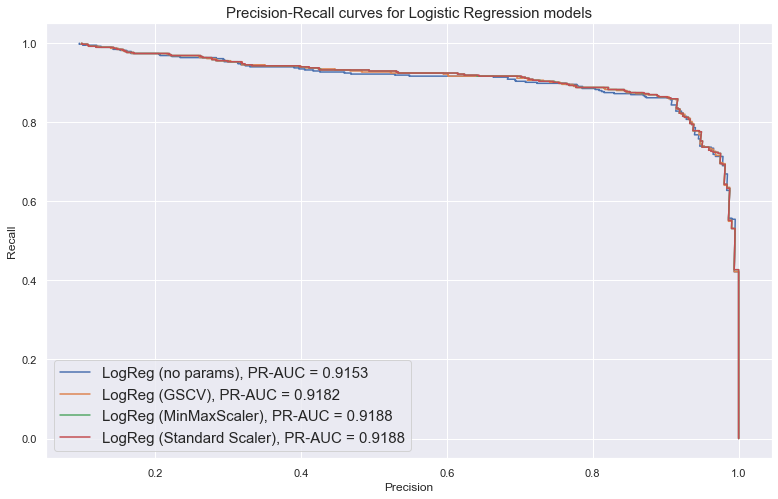

In [409]:
_ = plt.figure(figsize=(13, 8))

precision, recall, threshold = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])
_ = plt.plot(precision, recall, label=f"LogReg (no params), PR-AUC = {round(logreg_pr_auc, 4)}")

precision, recall, threshold = precision_recall_curve(y_test, logreg_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(precision, recall, label=f"LogReg (GSCV), PR-AUC = {round(logreg_gscv_pr_auc, 4)}")

precision, recall, threshold = precision_recall_curve(y_test, logreg_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
_ = plt.plot(precision, recall, label=f"LogReg (MinMaxScaler), PR-AUC = {round(logreg_gscv_minmax_pr_auc, 4)}")

precision, recall, threshold = precision_recall_curve(y_test, logreg_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(precision, recall, label=f"LogReg (Standard Scaler), PR-AUC = {round(logreg_gscv_stand_pr_auc, 4)}")


_ = plt.xlabel("Precision")
_ = plt.ylabel("Recall")
_ = plt.title("Precision-Recall curves for Logistic Regression models", fontsize=15)

_ = plt.legend(loc='lower left', fontsize=15)
plt.show()

In [496]:
logreg_models = [logreg, logreg_gscv, logreg_gscv_minmax, logreg_gscv_scaled]
logreg_strings = ['LogReg', 'LogReg (GSCV)', 'LogReg (StandardScaler)', 'LogReg (MinMaxScaler)']
logreg_pr_auc_scores = [
    round(average_precision_score(y_test, logreg.predict_proba(X_test)[:, 1]), 3),
    round(average_precision_score(y_test, logreg_gscv.predict_proba(X_test)[:, 1]), 3),
    round(average_precision_score(y_test, logreg_gscv_minmax.predict_proba(X_test_minmax)[:, 1]), 3),
    round(average_precision_score(y_test, logreg_gscv_stand.predict_proba(X_test_stand)[:, 1]), 3)

]
logreg_roc_auc_scores = [
    round(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]), 3),
    round(roc_auc_score(y_test, logreg_gscv.predict_proba(X_test)[:, 1]), 3),
    round(roc_auc_score(y_test, logreg_gscv_minmax.predict_proba(X_test_minmax)[:, 1]), 3),
    round(roc_auc_score(y_test, logreg_gscv_stand.predict_proba(X_test_stand)[:, 1]), 3)

]

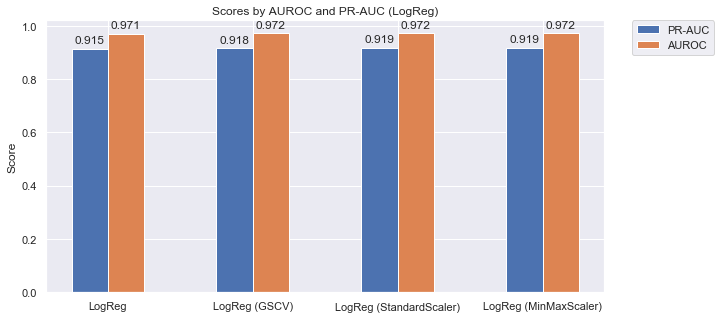

In [498]:
label_loc = np.arange(len(logreg_strings))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(label_loc - width/2, logreg_pr_auc_scores, width, label='PR-AUC')
rects2 = ax.bar(label_loc + width/2, logreg_roc_auc_scores, width, label='AUROC')

ax.set_ylabel('Score')
ax.set_title('Scores by AUROC and PR-AUC (LogReg)')
ax.set_xticks(label_loc)
ax.set_xticklabels(logreg_strings)

        
autolabel(rects1)
autolabel(rects2)

plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=.0)
plt.show()

### Log Reg Result: Tie between Standard and MinMax scalers, pick Standard

# Random Forest

In [283]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [418]:
rf_auroc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
rf_pr_auc = average_precision_score(y_test, rf.predict(X_test))

print(f"AUROC score: {rf_auroc}")
print(f"PR-AUC score: {rf_pr_auc}")

AUROC score: 0.9577680681170047
PR-AUC score: 0.7652407322049366


In [419]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.90      0.83      0.87       384

    accuracy                           0.98      4475
   macro avg       0.94      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



### Random Forest with Grid Search

In [285]:
param_grid = {
    'n_estimators' : np.arange(10, 500, 50),
    'max_depth' : [10, 20, 30]
}

rf_gscv = GridSearchCV(RandomForestClassifier(), param_grid=param_grid).fit(X_train, y_train)

In [420]:
rf_gscv_auroc = roc_auc_score(y_test, rf_gscv.predict_proba(X_test)[:, 1])
rf_gscv_pr_auc = average_precision_score(y_test, rf_gscv.predict(X_test))

print(f"AUROC score: {rf_gscv_auroc}")
print(f"Best parameters: {rf_gscv.best_params_}")
print(f"PR-AUC score: {rf_gscv_pr_auc}")

AUROC score: 0.9711374180110813
Best parameters: {'max_depth': 30, 'n_estimators': 260}
PR-AUC score: 0.7791641237500586


In [421]:
print(classification_report(y_test, rf_gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4091
           1       0.91      0.84      0.87       384

    accuracy                           0.98      4475
   macro avg       0.95      0.92      0.93      4475
weighted avg       0.98      0.98      0.98      4475



### Test using scaled data (MinMaxScaler and Standard Scaler)

#### MinMaxScaled data

In [287]:
param_grid = {
    'n_estimators' : np.arange(10, 500, 50),
    'max_depth' : [10, 20, 30]
}

rf_gscv_minmax = GridSearchCV(RandomForestClassifier(), param_grid=param_grid).fit(X_train_minmax, y_train)

In [422]:
rf_gscv_minmax_auroc = roc_auc_score(y_test, rf_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
rf_gscv_minmax_pr_auc = average_precision_score(y_test, rf_gscv_minmax.predict(X_test_minmax))

print(f"AUROC score: {rf_gscv_minmax_auroc}")
print(f"Best parameters: {rf_gscv_minmax.best_params_}")
print(f"PR-AUC score: {rf_gscv_minmax_pr_auc}")

AUROC score: 0.968790739835411
Best parameters: {'max_depth': 30, 'n_estimators': 210}
PR-AUC score: 0.7740357690450801


In [423]:
print(classification_report(y_test, rf_gscv_minmax.predict(X_test_minmax)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4091
           1       0.91      0.83      0.87       384

    accuracy                           0.98      4475
   macro avg       0.95      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



####  StandardScaled data

In [289]:
param_grid = {
    'n_estimators' : np.arange(10, 500, 50),
    'max_depth' : [10, 20, 30]
}

rf_gscv_stand = GridSearchCV(RandomForestClassifier(), param_grid=param_grid).fit(X_train_stand, y_train)


In [424]:
rf_gscv_stand_auroc = roc_auc_score(y_test, rf_gscv_stand.predict_proba(X_test_stand)[:, 1])
rf_gscv_stand_pr_auc = average_precision_score(y_test, rf_gscv_stand.predict(X_test_stand))

print(f"AUROC: {rf_gscv_stand_auroc}")
print(f"Best parameters: {rf_gscv_stand.best_params_}")
print(f"PR-AUC score: {rf_gscv_stand_pr_auc}")

AUROC: 0.9641260286808443
Best parameters: {'max_depth': 30, 'n_estimators': 60}
PR-AUC score: 0.7626580789438681


In [431]:
print(classification_report(y_test, gb_gscv_stand.predict(X_test_stand)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4091
           1       0.91      0.86      0.88       384

    accuracy                           0.98      4475
   macro avg       0.95      0.93      0.94      4475
weighted avg       0.98      0.98      0.98      4475



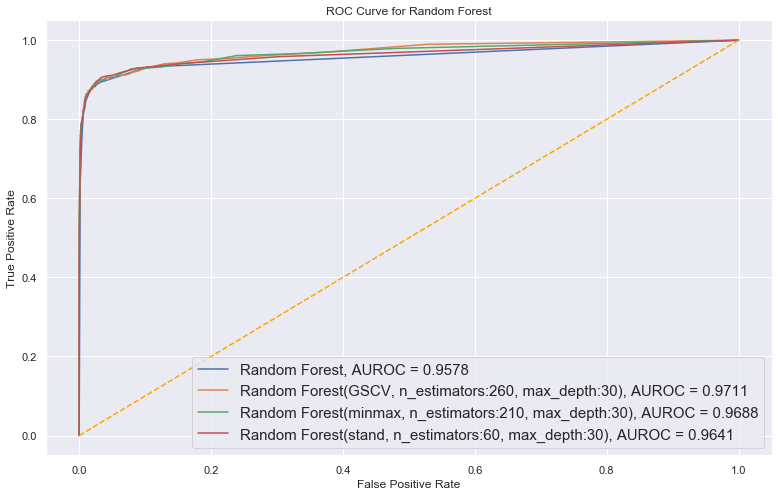

In [293]:
_ = plt.figure(figsize=(13, 8))


fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
_ = plt.plot(fpr, tpr, label=f"Random Forest, AUROC = {round(rf_auroc, 4)}")

fpr, tpr, thresholds = roc_curve(y_test, rf_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(fpr, tpr, label=f"Random Forest(GSCV, n_estimators:{rf_gscv.best_params_.get('n_estimators')}, "
             f"max_depth:{rf_gscv.best_params_.get('max_depth')}), AUROC = {round(rf_gscv_auroc, 4)}")

fpr, tpr, thresholds = roc_curve(y_test, rf_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
_ = plt.plot(fpr, tpr, label=f"Random Forest(minmax, n_estimators:{rf_gscv_minmax.best_params_.get('n_estimators')}, "
             f"max_depth:{rf_gscv_minmax.best_params_.get('max_depth')}), AUROC = {round(rf_gscv_minmax_auroc, 4)}")

fpr, tpr, thresholds = roc_curve(y_test, rf_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(fpr, tpr, label=f"Random Forest(stand, n_estimators:{rf_gscv_stand.best_params_.get('n_estimators')}, "
             f"max_depth:{rf_gscv_stand.best_params_.get('max_depth')}), AUROC = {round(rf_gscv_stand_auroc, 4)}")



_ = plt.plot([0, 1], [0, 1], linestyle='--', color='orange')

_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve for Random Forest')

plt.legend(fontsize=15)
plt.show()

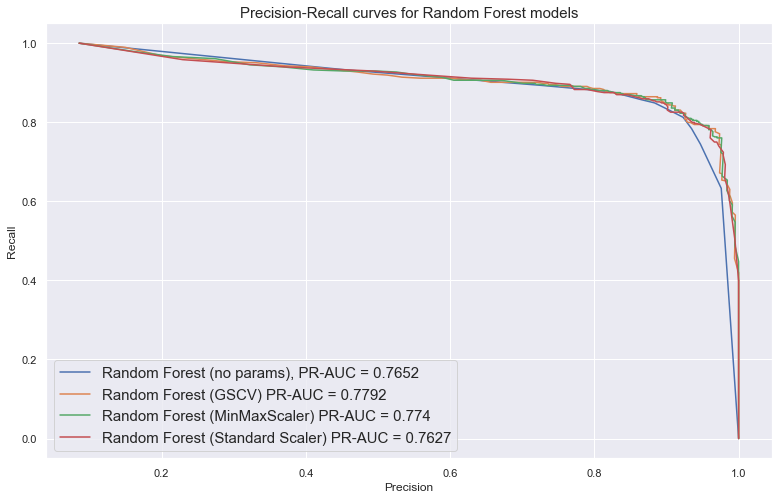

In [427]:
_ = plt.figure(figsize=(13, 8))

precision, recall, threshold = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
_ = plt.plot(precision, recall, label=f"Random Forest (no params), PR-AUC = {round(rf_pr_auc, 4)}")

precision, recall, threshold = precision_recall_curve(y_test, rf_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(precision, recall, label=f"Random Forest (GSCV) PR-AUC = {round(rf_gscv_pr_auc, 4)}")

precision, recall, threshold = precision_recall_curve(y_test, rf_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
_ = plt.plot(precision, recall, label=f"Random Forest (MinMaxScaler) PR-AUC = {round(rf_gscv_minmax_pr_auc, 4)}")

precision, recall, threshold = precision_recall_curve(y_test, rf_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(precision, recall, label=f"Random Forest (Standard Scaler) PR-AUC = {round(rf_gscv_stand_pr_auc, 4)}")


_ = plt.xlabel("Precision")
_ = plt.ylabel("Recall")
_ = plt.title("Precision-Recall curves for Random Forest models", fontsize=15)

_ = plt.legend(loc='lower left', fontsize=15)
plt.show()

In [491]:
rf_models = [rf, rf_gscv, rf_gscv_minmax, rf_gscv_scaled]
rf_strings = ['RF', 'RF (GSCV)', 'RF (StandardScaler)', 'RF (MinMaxScaler)']
rf_pr_auc_scores = [
    round(average_precision_score(y_test, rf.predict_proba(X_test)[:, 1]), 3),
    round(average_precision_score(y_test, rf_gscv.predict_proba(X_test)[:, 1]), 3),
    round(average_precision_score(y_test, rf_gscv_minmax.predict_proba(X_test_minmax)[:, 1]), 3),
    round(average_precision_score(y_test, rf_gscv_stand.predict_proba(X_test_stand)[:, 1]), 3)

]
rf_roc_auc_scores = [
    round(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]), 3),
    round(roc_auc_score(y_test, rf_gscv.predict_proba(X_test)[:, 1]), 3),
    round(roc_auc_score(y_test, rf_gscv_minmax.predict_proba(X_test_minmax)[:, 1]), 3),
    round(roc_auc_score(y_test, rf_gscv_stand.predict_proba(X_test_stand)[:, 1]), 3)

]

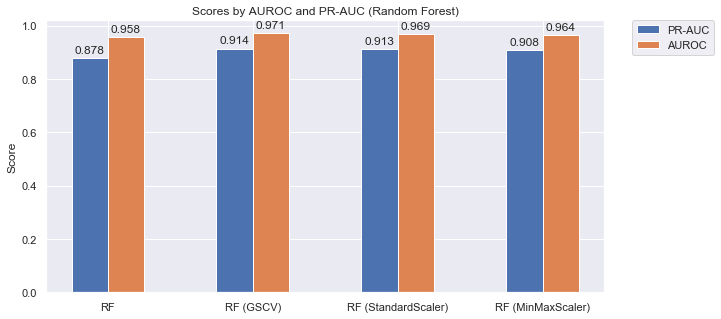

In [493]:
label_loc = np.arange(len(rf_strings))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(label_loc - width/2, rf_pr_auc_scores, width, label='PR-AUC')
rects2 = ax.bar(label_loc + width/2, rf_roc_auc_scores, width, label='AUROC')

ax.set_ylabel('Score')
ax.set_title('Scores by AUROC and PR-AUC (Random Forest)')
ax.set_xticks(label_loc)
ax.set_xticklabels(rf_strings)

        
autolabel(rects1)
autolabel(rects2)

plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=.0)
plt.show()

# Gradient Boosting Classifier

In [294]:
gb = GradientBoostingClassifier().fit(X_train, y_train)

In [428]:
gb_auroc = roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1])
gb_pr_auc = average_precision_score(y_test, gb.predict_proba(X_test)[:, 1])
print()

print(f"AUROC score: {gb_auroc}")
print(f"PR-AUC score: {gb_pr_auc}")


AUROC score: 0.9749287689440236
PR-AUC score: 0.8790235477689753


In [430]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4091
           1       0.89      0.85      0.87       384

    accuracy                           0.98      4475
   macro avg       0.94      0.92      0.93      4475
weighted avg       0.98      0.98      0.98      4475



### Gradient Boosting with Grid Search

In [296]:
param_grid = {'learning_rate' : [.0001, .001, .01, .1], 'n_estimators' : [250, 300, 350, 400]}

gb_gscv = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid).fit(X_train, y_train)

In [297]:
gb_gscv_auroc = roc_auc_score(y_test, gb_gscv.predict_proba(X_test)[:, 1])
print(f"AUROC: {gb_gscv_auroc}")
print(f"Best parameters: {gb_gscv.best_params_}")

AUROC: 0.9733185906053938
Best parameters: {'learning_rate': 0.01, 'n_estimators': 300}


### Test using scaled data (MinMaxScaler and Standard Scaler)

#### MinMaxScaled data

In [298]:
param_grid = {'learning_rate' : [.0001, .001, .01, .1], 'n_estimators' : [150, 200, 250]}

gb_gscv_minmax = GridSearchCV(GradientBoostingClassifier(), 
                              param_grid=param_grid).fit(X_train_minmax, y_train)

In [299]:
gb_gscv_minmax_auroc = roc_auc_score(y_test, gb_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
print(f"AUROC: {gb_gscv_minmax_auroc}")
print(f"Best parameters: {gb_gscv_minmax.best_params_}")

AUROC: 0.9723503829544529
Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}


#### StandardScaled data

In [300]:
param_grid = {'learning_rate' : [.0001, .001, .01, .1], 'n_estimators' : [50, 100, 150]}

gb_gscv_stand = GridSearchCV(GradientBoostingClassifier(), 
                              param_grid=param_grid).fit(X_train_stand, y_train)

In [301]:
gb_gscv_stand_auroc = roc_auc_score(y_test, gb_gscv_stand.predict_proba(X_test_stand)[:, 1])
print(f"AUROC: {gb_gscv_stand_auroc}")
print(f"Best parameters: {gb_gscv_stand.best_params_}")

AUROC: 0.975114007883158
Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}


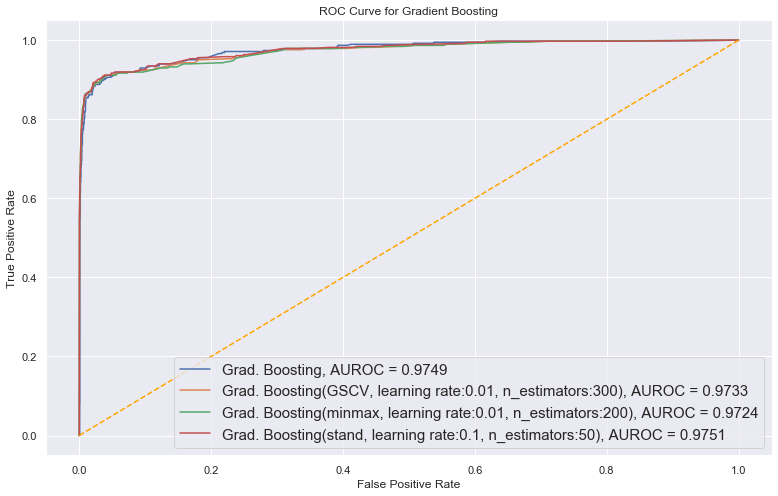

In [302]:
_ = plt.figure(figsize=(13, 8))


fpr, tpr, threshold = roc_curve(y_test, gb.predict_proba(X_test)[:, 1])
_ = plt.plot(fpr, tpr, label=f"Grad. Boosting, AUROC = {round(gb_auroc, 4)}")

fpr, tpr, threshold = roc_curve(y_test, gb_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(fpr, tpr, label=f"Grad. Boosting(GSCV, learning rate:{gb_gscv.best_params_.get('learning_rate')}, "
            f"n_estimators:{gb_gscv.best_params_.get('n_estimators')}), AUROC = {round(gb_gscv_auroc, 4)}")

fpr, tpr, threshold = roc_curve(y_test, gb_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
_ = plt.plot(fpr, tpr, label=f"Grad. Boosting(minmax, learning rate:{gb_gscv_minmax.best_params_.get('learning_rate')}, "
            f"n_estimators:{gb_gscv_minmax.best_params_.get('n_estimators')}), AUROC = {round(gb_gscv_minmax_auroc, 4)}")

fpr, tpr, threshold = roc_curve(y_test, gb_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(fpr, tpr, label=f"Grad. Boosting(stand, learning rate:{gb_gscv_stand.best_params_.get('learning_rate')}, "
            f"n_estimators:{gb_gscv_stand.best_params_.get('n_estimators')}), AUROC = {round(gb_gscv_stand_auroc, 4)}")






_ = plt.plot([0, 1], [0, 1], linestyle='--', color='orange')

_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve for Gradient Boosting')

plt.legend(fontsize=15)
plt.show()

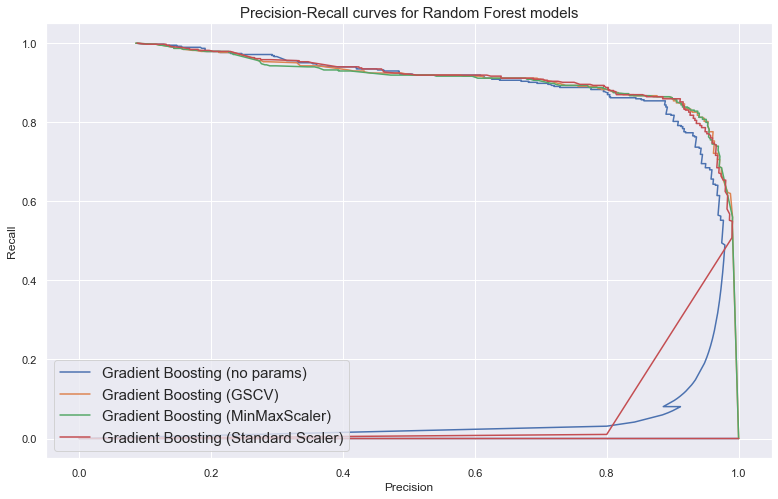

In [381]:
_ = plt.figure(figsize=(13, 8))

precision, recall, threshold = precision_recall_curve(y_test, gb.predict_proba(X_test)[:, 1])
_ = plt.plot(precision, recall, label=f"Gradient Boosting (no params)")

precision, recall, threshold = precision_recall_curve(y_test, gb_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(precision, recall, label=f"Gradient Boosting (GSCV)")

precision, recall, threshold = precision_recall_curve(y_test, gb_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
_ = plt.plot(precision, recall, label=f"Gradient Boosting (MinMaxScaler)")

precision, recall, threshold = precision_recall_curve(y_test, gb_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(precision, recall, label=f"Gradient Boosting (Standard Scaler)")


_ = plt.xlabel("Precision")
_ = plt.ylabel("Recall")
_ = plt.title("Precision-Recall curves for Random Forest models", fontsize=15)

_ = plt.legend(loc='lower left', fontsize=15)
plt.show()

In [499]:
gb_models = [gb, gb_gscv, gb_gscv_minmax, gb_gscv_scaled]
gb_strings = ['GB', 'GB (GSCV)', 'GB (StandardScaler)', 'GB (MinMaxScaler)']
gb_pr_auc_scores = [
    round(average_precision_score(y_test, gb.predict_proba(X_test)[:, 1]), 3),
    round(average_precision_score(y_test, gb_gscv.predict_proba(X_test)[:, 1]), 3),
    round(average_precision_score(y_test, gb_gscv_minmax.predict_proba(X_test_minmax)[:, 1]), 3),
    round(average_precision_score(y_test, gb_gscv_stand.predict_proba(X_test_stand)[:, 1]), 3)

]
gb_roc_auc_scores = [
    round(roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]), 3),
    round(roc_auc_score(y_test, gb_gscv.predict_proba(X_test)[:, 1]), 3),
    round(roc_auc_score(y_test, gb_gscv_minmax.predict_proba(X_test_minmax)[:, 1]), 3),
    round(roc_auc_score(y_test, gb_gscv_stand.predict_proba(X_test_stand)[:, 1]), 3)

]

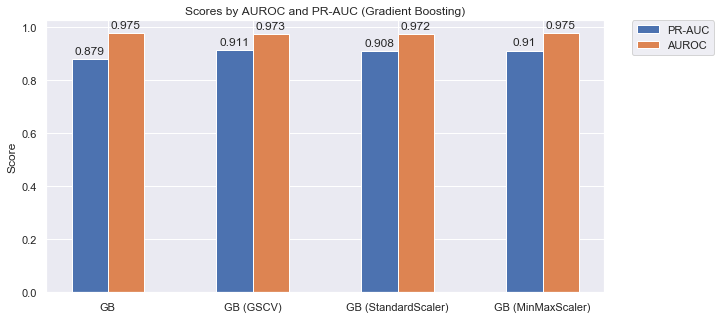

In [500]:
label_loc = np.arange(len(gb_strings))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(label_loc - width/2, gb_pr_auc_scores, width, label='PR-AUC')
rects2 = ax.bar(label_loc + width/2, gb_roc_auc_scores, width, label='AUROC')

ax.set_ylabel('Score')
ax.set_title('Scores by AUROC and PR-AUC (Gradient Boosting)')
ax.set_xticks(label_loc)
ax.set_xticklabels(gb_strings)

        
autolabel(rects1)
autolabel(rects2)

plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=.0)
plt.show()

# Comparison of top performing models

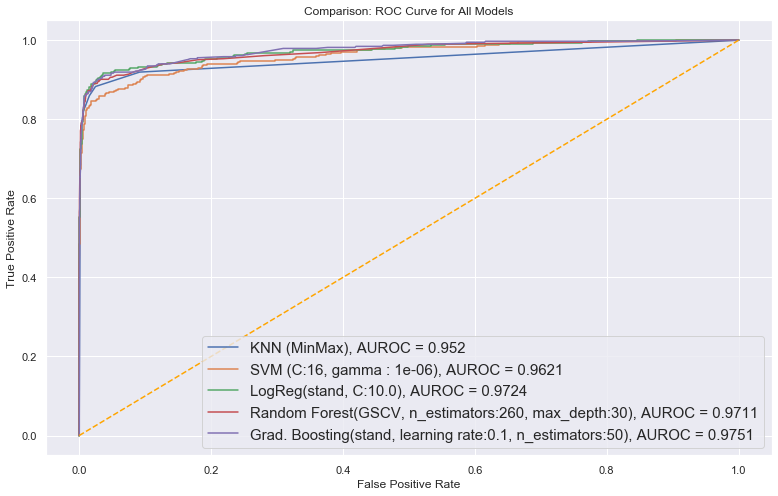

In [305]:
_ = plt.figure(figsize=(13, 8))


fpr, tpr, thresholds = roc_curve(y_test, knn_gscv_minmax.predict_proba(X_test_minmax)[:, 1])
_ = plt.plot(fpr_minmax, tpr_minmax, label=f"KNN (MinMax), AUROC = {round(knn_gscv_minmax_auroc, 4)}")

fpr, tpr, threshold = roc_curve(y_test, svm_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(fpr, tpr, label=f"SVM (C:{svm_gscv.best_params_.get('C')}, gamma : {svm_gscv.best_params_.get('gamma')}), AUROC = {round(svm_gscv_auroc, 4)}")

fpr, tpr, thresholds = roc_curve(y_test, logreg_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(fpr, tpr, label=f"LogReg(stand, C:{logreg_gscv_stand.best_params_.get('C')}), AUROC = {round(logreg_gscv_stand_auroc, 4)}")

fpr, tpr, thresholds = roc_curve(y_test, rf_gscv.predict_proba(X_test)[:, 1])
_ = plt.plot(fpr, tpr, label=f"Random Forest(GSCV, n_estimators:{rf_gscv.best_params_.get('n_estimators')}, "
             f"max_depth:{rf_gscv.best_params_.get('max_depth')}), AUROC = {round(rf_gscv_auroc, 4)}")

fpr, tpr, threshold = roc_curve(y_test, gb_gscv_stand.predict_proba(X_test_stand)[:, 1])
_ = plt.plot(fpr, tpr, label=f"Grad. Boosting(stand, learning rate:{gb_gscv_stand.best_params_.get('learning_rate')}, "
            f"n_estimators:{gb_gscv_stand.best_params_.get('n_estimators')}), AUROC = {round(gb_gscv_stand_auroc, 4)}")

_ = plt.plot([0, 1], [0, 1], linestyle='--', color='orange')

_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Comparison: ROC Curve for All Models')

plt.legend(fontsize=15)
plt.show()